In [49]:
#Notebook for experiments in gathering data

In [50]:
import os
import re
import csv
import requests
import warnings
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm, tqdm_notebook
#warnings.filterwarnings('ignore')

In [51]:
# load directors names
male_directors_path = f"../data/director_lists/wiki/male_directors_wiki_latinized_20190616.csv"
female_directors_path = f"../data/director_lists/wiki/female_directors_wiki_latinized_20190616.csv"
male_directors_df = pd.read_csv(male_directors_path)
female_directors_df = pd.read_csv(female_directors_path)
print(len(male_directors_df), len(female_directors_df))

1772 1035


In [52]:
male_names = set(male_directors_df.name)
female_names = set(female_directors_df.name)
print(len(male_names), len(female_names))

1772 1035


In [53]:
# ignore actresses/actors

male_directors_stop_list_path = "../data/director_lists/wiki/so_called_male_directors_from_top_200_deadline_20190707.txt"
female_directors_stop_list_path = "../data/director_lists/wiki/so_called_female_directors_from_top_170_deadline_20190707.txt"

with open(male_directors_stop_list_path, 'r') as f_male, open(female_directors_stop_list_path, 'r') as f_female:
    male_stop_names = set()
    for line in f_male:
        male_stop_names.add(line[:-1])
    male_names = male_names - male_stop_names    
    female_stop_names = set()    
    for line in f_female:
        female_stop_names.add(line[:-1])
    female_names = female_names - female_stop_names
        
print(len(male_names), len(female_names))

1746 991


In [112]:
#media_name = "deadline"
#media_name = "hollywood_reporter"
media_name = "variety"
path = f"../data/full_{media_name}_df.csv"
df = pd.read_csv(path)
df = df.drop(df.columns[0], axis=1)
#df.head()

In [113]:
#Parsing script
'''
def parse_date(str_date):
    year = (int)(str_date[:4])
    month = (int)(str_date[:7][5:])
    return (year, month)

def valid_date(str_date):
    year = parse_date(str_date)[0]
    if year >= 2008 and year <= 2018:
        return True
    else:
        return False;
    
def find_in(line, names):
    res = []
    for name in names:
        if name in line:
            res.append(name)
    return res    
    
def process(df, male_names, female_names):
    males = dict()
    females = dict()
    with tqdm(desc="rows", total=len(df)) as pbar_outer:    
        for row in df.itertuples():
            # check only required dates
            if media_name == 'deadline' or media_name == 'variety':
                str_date = getattr(row, 'published_at')
            elif media_name == 'hollywood_reporter':
                str_date = getattr(row, 'date')
            try:
                if not valid_date(str_date):
                    pbar_outer.update(1)
                    continue
            except:
                print(row)
                pbar_outer.update(1)
                continue
            
            # go through text to find directors
            month = parse_date(str_date)
            text_path = getattr(row, 'text_path')
            for line in open(f'../../modified_dfs/{text_path}'):
                # look up male names
                for name in find_in(line, male_names):
                    if month in males:
                        if name in males[month]:
                            males[month][name].append(text_path)                                 
                        else:
                            males[month][name] = [text_path]
                    else:
                        males[month] = {name : [text_path]}
                # look up female names        
                for name in find_in(line, female_names):
                    if month in females:
                        if name in females[month]:
                            females[month][name].append(text_path)                                                             
                        else:
                            females[month][name] = [text_path]
                    else:
                        females[month] = {name : [text_path]}    
            pbar_outer.update(1)
    return males, females            

males, females = process(df, male_names, female_names)
'''

'\ndef parse_date(str_date):\n    year = (int)(str_date[:4])\n    month = (int)(str_date[:7][5:])\n    return (year, month)\n\ndef valid_date(str_date):\n    year = parse_date(str_date)[0]\n    if year >= 2008 and year <= 2018:\n        return True\n    else:\n        return False;\n    \ndef find_in(line, names):\n    res = []\n    for name in names:\n        if name in line:\n            res.append(name)\n    return res    \n    \ndef process(df, male_names, female_names):\n    males = dict()\n    females = dict()\n    with tqdm(desc="rows", total=len(df)) as pbar_outer:    \n        for row in df.itertuples():\n            # check only required dates\n            if media_name == \'deadline\' or media_name == \'variety\':\n                str_date = getattr(row, \'published_at\')\n            elif media_name == \'hollywood_reporter\':\n                str_date = getattr(row, \'date\')\n            try:\n                if not valid_date(str_date):\n                    pbar_outer.upd

In [114]:
path = '../data/director_mentions'
female_path = f'{path}/female_mention_backup_{media_name}_20190707.txt'
male_path = f'{path}/male_mention_backup_{media_name}_20190707.txt'

In [115]:
'''
with open(female_path, 'w') as f_out:
    for mnth, dct in females.items():    
        for name, articles in dct.items():
            res = str(mnth) + ' ' + name + ' '
            for item in articles:
                res += item + ' '
            res += '\n'   
            f_out.write(res)
            
with open(male_path, 'w') as f_out:
    for mnth, dct in males.items():    
        for name, articles in dct.items():
            res = str(mnth) + ' ' + name + ' '
            for item in articles:
                res += item + ' '
            res += '\n'   
            f_out.write(res)            
'''

"\nwith open(female_path, 'w') as f_out:\n    for mnth, dct in females.items():    \n        for name, articles in dct.items():\n            res = str(mnth) + ' ' + name + ' '\n            for item in articles:\n                res += item + ' '\n            res += '\n'   \n            f_out.write(res)\n            \nwith open(male_path, 'w') as f_out:\n    for mnth, dct in males.items():    \n        for name, articles in dct.items():\n            res = str(mnth) + ' ' + name + ' '\n            for item in articles:\n                res += item + ' '\n            res += '\n'   \n            f_out.write(res)            \n"

In [116]:
import string

alphabet_lower = string.ascii_lowercase + " -"
alphabet_full = string.ascii_uppercase + alphabet_lower

converter = {'á' : 'a',
             'ã' : 'a',
             'ä' : 'a',
             'ç' : 'c',
             'è' : 'e',
             'ě' : 'e',                         
             'é' : 'e',
             'ë' : 'e',
             'ę' : 'e',
             'í' : 'i',
             'ï' : 'i',
             'ñ' : 'n',
             'ó' : 'o',
             'ö' : 'o',
             'ø' : 'o',
             'ú' : 'u',
             'ü' : 'u',
             'ý' : 'y',
             'ć' : 'c',
             'ı' : 'i',
             'ł' : 'l',
             'ń' : 'n',
             'ň' : 'n',
             'ō' : 'o',
             'ô' : 'o',             
             'ś' : 's',
             'š' : 's',
             'ū' : 'u',
             'ž' : 'z',             
             'ż' : 'z',
             'É' : 'E',
             'Š' : 'S',             
             'Ž' : 'Z',
             'Ż' : 'Z'}

def contain_not_ascii(string):
    for ch in string:
        if ch not in alphabet_full:
            return True
    return False    

def convert_to_ascii(string):
    res = ""
    for ch in string:
        if ch not in alphabet_full:
            if ch in converter:
                ch = converter[ch]
            else:
                print(ch)
        res += ch
    return res    
    
convert_to_ascii("Pedro Almodóvar") 

'Pedro Almodovar'

In [117]:
## load from disk and process

def stats(path, directors_top_slice_percent=0, verbose=False):
    dct = dict()    
    # construct dict from saved data
    for line in open(path, 'r'):    
        lst = line.split()                
        
        # parse date
        i = 0
        date = (lst[i][1:][:-1], lst[i+1][:-1])                        
        i = i + 2            
        
        # parse director`s name
        name = ''
        while lst[i][:len(media_name)] != media_name:
            if name != '':
                name += ' '
            name += lst[i]
            i = i + 1        

        # parse mentions
        mentions = set(lst[i:])
        mentions = len(mentions)
    
        # fill dict
        if date in dct:
            dct[date][name] = mentions
        else:
            dct[date] = {name : mentions}
    #####################################            
        
    # Calculate sorted dates (year, month) (x axis)
    dates = []
    for key, value in dct.items():
        dates.append(key)
    dates.sort()
    if verbose:
        print("x(dates):", dates)
        print('\n')    
            
    # Calculate dict {name : fame}, where fame is number of mentions
    director_fame = dict()
    for x in dates:
        for name, value in dct[x].items():
            name = convert_to_ascii(name)
            if name in director_fame:
                director_fame[name] += value
            else:
                director_fame[name] = value

    # Calculate directors list sorted by fame
    fame = []            
    for name, score in director_fame.items():
        fame.append((score, name))
    fame = sorted(fame, key=lambda x: (-x[0], x[1]))
    if verbose:
        for x in fame:
            print(x)
        print('\n')
        
    # Calculate ignore list -- percentage of top directors who are ignored
    slice_size = (int) (directors_top_slice_percent * len(fame) / 100.)
    ignore_list = set([x[1] for x in fame[:slice_size]])
    if verbose:
        print("ignore list:", ignore_list)
        print('\n')
        
    # Calculate mentions(x) -- number of articles per month
    mentions = []
    for x in dates:
        total_x = 0
        for key, value in dct[x].items():
            if key not in ignore_list:                
                total_x += value
        mentions.append(total_x)
    if verbose:    
        print("y(mentions):", mentions)
        print('\n')    
        
    return dates, mentions, fame

In [118]:
dates, mentions, fame = stats(female_path)

with open(f'{path}/female_mentions_per_month_{media_name}_20190707.txt', 'w') as f_out:
    for i in range(len(dates)):
        f_out.write(str(dates[i][0]) + ' ' + str(dates[i][1]) + ' ' + str(mentions[i]) + '\n')

with open(f'{path}/female_fame_top_{media_name}_20190707.txt', 'w') as f_out:       
    for p in fame:
        f_out.write(str(p) + '\n')

In [119]:
dates, mentions, fame = stats(male_path)

with open(f'{path}/male_mentions_per_month_{media_name}_20190707.txt', 'w') as f_out:
    for i in range(len(dates)):
        f_out.write(str(dates[i][0]) + ' ' + str(dates[i][1]) + ' ' + str(mentions[i]) + '\n')

with open(f'{path}/male_fame_top_{media_name}_20190707.txt', 'w') as f_out:       
    for p in fame:
        f_out.write(str(p) + '\n')

In [120]:
try:
    os.mkdir(f'{path}/slice_data/')
except:
    pass

for p in range(0, 11):
    try:
        os.mkdir(f'{path}/slice_data/{p}')
    except:
        pass
    
    dates, mentions, fame = stats(female_path, p)    
    with open(f'{path}/slice_data/{p}/female_mentions_per_month_{media_name}_20190716.txt', 'w') as f_out:
        for i in range(len(dates)):
            f_out.write(str(dates[i][0]) + ' ' + str(dates[i][1]) + ' ' + str(mentions[i]) + '\n')
    
    dates, mentions, fame = stats(male_path, p)    
    with open(f'{path}/slice_data/{p}/male_mentions_per_month_{media_name}_20190716.txt', 'w') as f_out:
        for i in range(len(dates)):
            f_out.write(str(dates[i][0]) + ' ' + str(dates[i][1]) + ' ' + str(mentions[i]) + '\n')        

Some graphics:

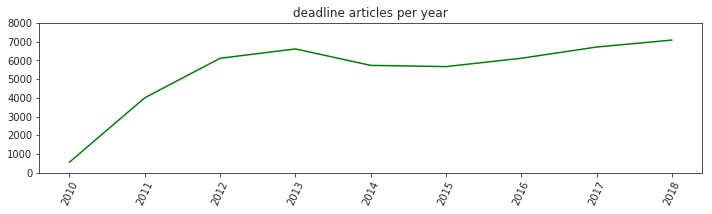

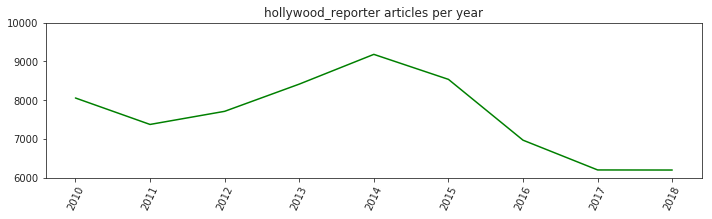

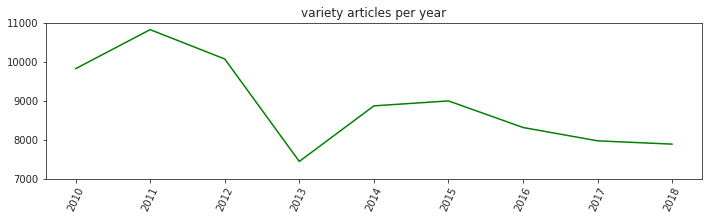

In [121]:
from math import floor
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

def get_articles_per_years(media_name):
    # load df
    path = f"../data/full_{media_name}_df.csv"
    df = pd.read_csv(path)
    df = df.drop(df.columns[0], axis=1)    
    
    # process dates
    if media_name == 'deadline' or media_name == 'variety':
        dates = df['published_at']
    elif media_name == 'hollywood_reporter':
        dates = df['date']    
    dates = dates.apply(lambda x: str(x)[:4]).tolist()
    dates = [int(x) for x in dates if x != 'nan' and int(x) >= 2010 and int(x) <= 2018]
    dates.sort()
    
    # return (year, count) dict
    return {key: len(list(group)) for key, group in groupby(dates)}

def plt_dct(media_name, subplot_args):
    plt.figure(figsize=(10,8))
    plt.subplot(subplot_args[0], subplot_args[1], subplot_args[2])
    dct = get_articles_per_years(media_name)
    sns.lineplot(x = list(dct.keys()), y = list(dct.values()), color = 'green')    
    plt.yticks(range(min(dct.values())//1000*1000, max(dct.values())+1000, 1000))
    plt.xticks(list(dct.keys()))
    plt.xticks(rotation=65)
    plt.title(f'{media_name} articles per year')    
    plt.tight_layout()

plt_dct('deadline', (3, 1, 1))
plt_dct('hollywood_reporter', (3,1,2))
plt_dct('variety', (3,1,3))
plt.show()